In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [24]:
# Load the training and testing datasets (update the paths if needed)
train_path = '/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv'
test_path = '/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)


In [25]:
# Select relevant features for C2 detection
features = ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload']
X_train = df_train[features]
X_test = df_test[features]

# Convert categorical features to numeric using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test sets have the same columns after encoding
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Label anomalies: '1' for attack, '0' for normal
y_train = df_train['attack_cat'].apply(lambda x: 1 if x != 'Normal' else 0)
y_test = df_test['attack_cat'].apply(lambda x: 1 if x != 'Normal' else 0)


In [26]:

# Feature scaling
scaler = StandardScaler()  # or MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [27]:

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Set desired values
# Train the model
knn.fit(X_train, y_train)
# Evaluate on test data
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy after tuning: 0.8745080891998251
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     37000
           1       0.84      0.96      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.89      0.87      0.87     82332
weighted avg       0.88      0.87      0.87     82332

Confusion Matrix:
[[28546  8454]
 [ 1878 43454]]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


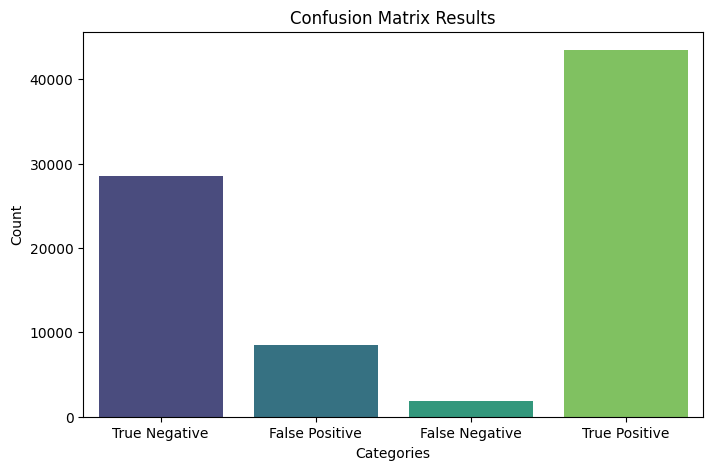

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a bar plot to show the results
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=counts, palette='viridis')
plt.title("Confusion Matrix Results")
plt.ylabel("Count")
plt.xlabel("Categories")
plt.show()